## Метод k ближайших соседей

Один из самых простых алгоритмов машинного обучения.  
Построение модели заключается в запоминании обучающего набора

## Классификация
Для новой точки данных находится k ближайших известных точек (из обучающего набора). Метка для новой точки выбирается на основе **голосования (voting)** - подсчитывается количество соседей, относящихся к каждому классу, затем новой точке присваивается наиболее частый класс среди k соседей.  
*здесь k - нечетное число*

In [50]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.target_names)
print(wine.data.shape)

['class_0' 'class_1' 'class_2']
(178, 13)


In [51]:
# разделим данные на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data,
                                                    wine.target,
                                                   random_state=0)
print(X_train.shape)

(133, 13)


In [52]:
# модель
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=15)

# обучение
knn_classifier.fit(X_train, y_train)

# прогнозирование
print('predicted classes: ',knn_classifier.predict(X_test[:10]))
print('real classes: ', y_test[:10])

# метрика качества (accuracy)
print(knn_classifier.score(X_test, y_test))

predicted classes:  [0 1 1 0 1 1 0 2 1 1]
real classes:  [0 2 1 0 1 1 0 2 1 1]
0.8


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53]


Text(0, 0.5, 'Точность')

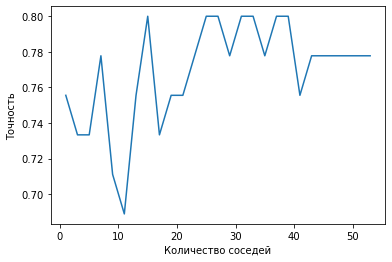

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
## проанализируем точность модели для разного количества соседей
accuracy = []
neighbors = [n for n in range(1, 55, 2)]
print(neighbors)

for n in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    knn_classifier.fit(X_train, y_train)
    accuracy.append(knn_classifier.score(X_test, y_test))
    
plt.plot(neighbors, accuracy, label='Точность на тестовом наборе')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')

## Регрессия
При использовании **одного** соседа: для новой точки данных будет присваиваться то целевое значение, которым владеет ближайший сосед.  
При использовании **нескольких соседей**: целевым значением становится среднее значение соответствующих значений.

In [54]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    random_state=0)
print('Исходные размеры: ', boston.data.shape)
print('Тренировочный набор: ', X_train.shape)

Исходные размеры:  (506, 13)
Тренировочный набор:  (379, 13)


In [55]:
# модель
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
print(knn_regressor)
print()

# обучение
knn_regressor.fit(X_train, y_train)

# предсказание
print('real targets: ', knn_regressor.predict(X_test[:10]))
print('real targets: ', y_test[:10])
print()

# Коэф. детерминации (R^2) для всего тестового набора
print('score = ', knn_regressor.score(X_test, y_test))

KNeighborsRegressor()

real targets:  [20.76 29.54 23.08 11.94 21.82 21.4  22.96 24.38 30.24 18.26]
real targets:  [22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6]

score =  0.4616380924610112


Text(0, 0.5, 'R^2')

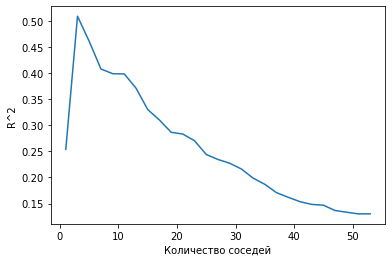

In [56]:
accuracy_regression = []
for n in neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=n)
    knn_regressor.fit(X_train, y_train)
    accuracy_regression.append(knn_regressor.score(X_test, y_test))
    
plt.plot(neighbors, accuracy_regression, label='Коэф. детерминации для knn - regression')
plt.xlabel('Количество соседей')
plt.ylabel('R^2')

## Резюме
KNeighbors содержит два важных параметра: **расстояние между точками** (по умолчанию Евклидово) и **количество соседей**.  
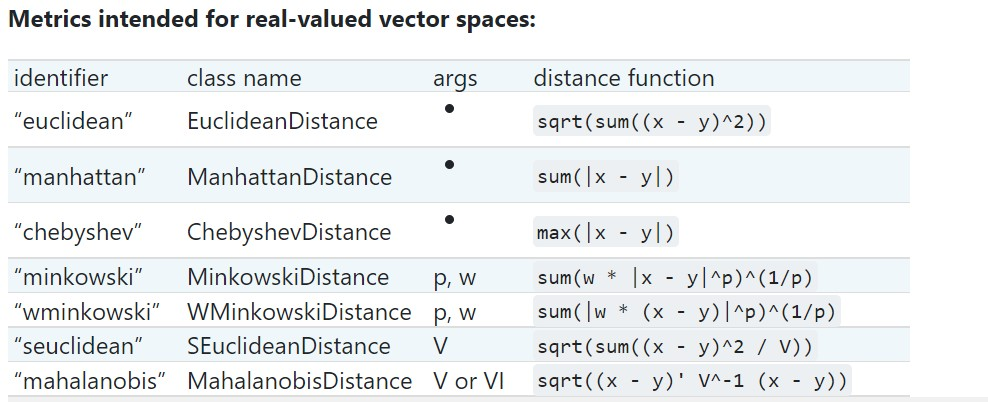  

**Преимущества:**
- модель легко интерпретировать
- приемлемое качество без многочисленных настроек параметров  

**Недостатки:**
- не очень хорошо работает в наборах с большим количество признаков (более сотни)
- плохо работает при *разреженных наборах данных (sparse datasets)*, то есть когда подавляющее число признаков имеет нулевые значения

Это хороший базовый алгоритм, который обычно пробуют перед применением более сложных моделей.